<a href="https://colab.research.google.com/github/Lucas-F-Analysis/Lucas-F-Analysis/blob/main/Ferreyra_Actividad_de_inmobiliaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La situación en la que nos encontramos es que recientemente me he incorporado al equipo de Datos de una gran empresa inmobiliaria. En este proyecto nuestra tarea es ayudar a los tasadores a evaluar las propiedades, ya que es un proceso difícil y a veces subjetivo. Para ello proponemos realizar un análisis de los datos con Python para ayudar a la inmobiliaria a tener un conocimiento profundo de los mismos para poder desarrollar la tarea minimizando el riesgo de errores y poder tomar decisiones correctas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Carga el dataset usando Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Inmobiliaria.csv")

In [ ]:
df

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


### Análisis Exploratorio de Datos

En esta sección, vamos a realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Vamos a hacernos las siguientes preguntas:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Valores Faltantes: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
valores_nulos_por_columna = df.isnull().sum()

# Mostrar la cantidad de valores nulos por columna, rellenar valores con media o modas si la muestra es chica
print(valores_nulos_por_columna)

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [ ]:
df = df.dropna()
valores_nulos_por_columnaa = df.isnull().sum()

# Mostrar la cantidad de valores nulos por columna, rellenar valores con media o modas si la muestra es chica
print(valores_nulos_por_columnaa)

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64


Tipos de propiedad: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. Pistas: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
print("Cantidad de tipos de propiedad: ", len(set(df["property_type"])))
t_propiedades = df.property_type.value_counts()
print(t_propiedades)

Cantidad de tipos de propiedad:  10
property_type
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: count, dtype: int64


¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables l2 y l3. Si te animas, puedes hacer los dos gráficos usando subplot de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

<ipython-input-7-ff49dc650c13>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  c_pt.set_xticklabels(c_pt.get_xticklabels(), rotation = 45, horizontalalignment = "right", fontweight = "light", fontsize = "x-large")


Text(0, 0.5, 'Cantidad')

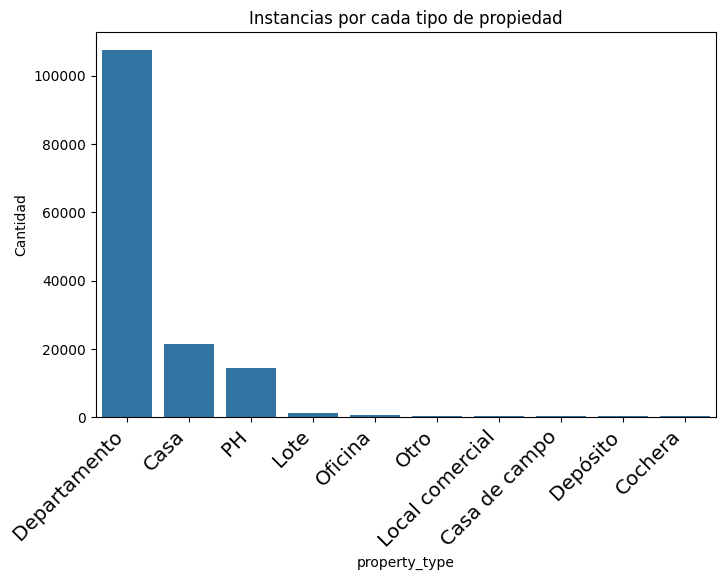

In [ ]:
plt.figure(figsize = (8, 5))
c_pt = sns.countplot(x="property_type", data=df, order = df["property_type"].value_counts().index) # Added data=df
c_pt.set_xticklabels(c_pt.get_xticklabels(), rotation = 45, horizontalalignment = "right", fontweight = "light", fontsize = "x-large")
plt.title("Instancias por cada tipo de propiedad")
plt.ylabel("Cantidad")

Conclusiones: Hay 146660 propiedades(representan el 100% de la cantidad de propiedades) en las que hay 10 tipos de propiedades diferentes(Departamentos, Casas, PH, Lotes, Oficinas, Otros, Locales Comerciales, Casas de campo, depositos, cocheras). Los tipos de propiedades que mas se venden son los departamentos, las casas y los PH. Hay 107326 departamentos(73,18% del total de las propiedades). Hay 21521 casas(14,67% del total). Y hay 14298 PH(9,7% del total). Y el resto de propiedades respresentan 2.45% del total, que son 3515 propiedades, entre las que se encuentran lotes, oficinas, otros, locales comerciales, casas de campo, depositos y cocheras.

Esto podría indicar tendencias hacia propiedades residenciales urbanas,  en contextos donde los departamentos son más deseados o mas accesibles.

<ipython-input-8-525bc7c1448f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, horizontalalignment='right')
<ipython-input-8-525bc7c1448f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, horizontalalignment='right')


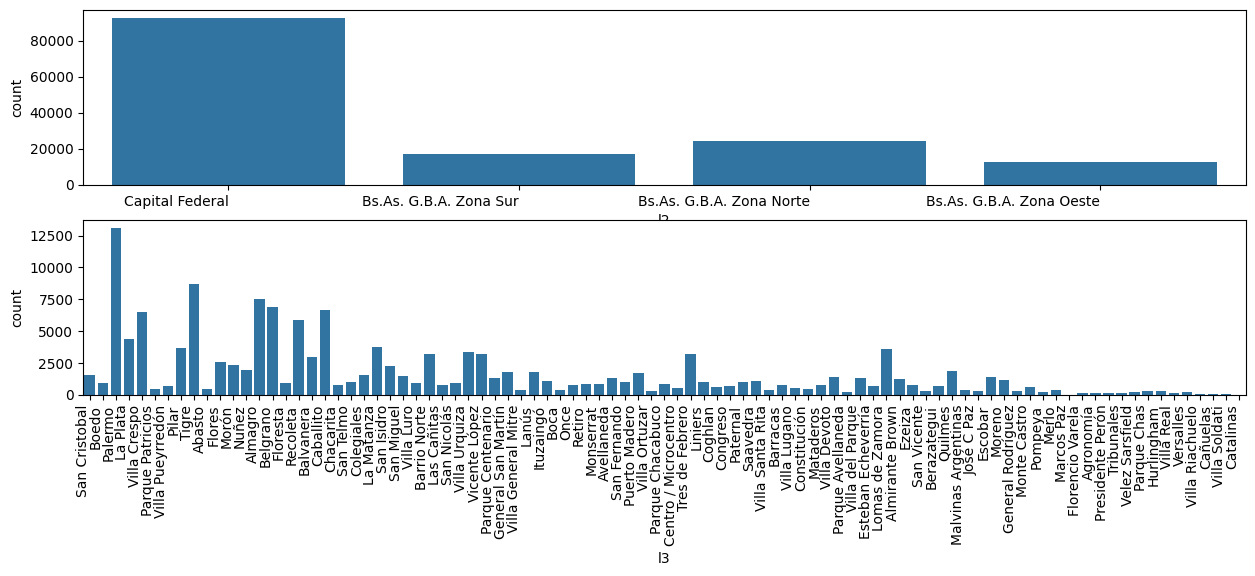

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(15, 5)) # evitar usar dos variables o la variable axes

sns.countplot(x='l2', data=df, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, horizontalalignment='right')

sns.countplot(x='l3', data=df, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

In [ ]:
print("Cantidad de ciudades: ", len(set(df["l2"])))
t_ciudades = df.l2.value_counts()
porcentajes = (t_ciudades / t_ciudades.sum()) * 100
print(t_ciudades)
print(porcentajes)
print("Los valores unicos son: ", df["l2"].unique())

Cantidad de ciudades:  4
l2
Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: count, dtype: int64
l2
Capital Federal             63.097641
Bs.As. G.B.A. Zona Norte    16.556662
Bs.As. G.B.A. Zona Sur      11.709396
Bs.As. G.B.A. Zona Oeste     8.636302
Name: count, dtype: float64
Los valores unicos son:  ['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']


Colcusiones por ciudades: Las 146660 propiedades que estamos analizando se encuentran en 4 ciudades diferentes(Capital Federal, GBA Zona Norte, GBA Zona Oeste, GBA Zona Sur). En las cuales en la Capital Federal hay 92539 propiedades(63.09% del total) siendo asi la region donde mas se concentran las ventas de propiedades y donde claramente domina el mercado en comparacion a las demas regiones. En Bs.As. G.B.A. Zona Norte hay 24282 propiedades(16.55% del total) y en Bs.As. G.B.A. Zona Sur hay 17173 propiedades(11,7% del total), indicando una considerable cantidad menor a Capital Federal. Y por ultimo en Bs.As. G.B.A. Zona Oeste hay 12666 propiedades(8.63% del total) que es la región que menos domina el mercado ya que es la region con menos cantidad de propiedades registradas, lo que puede indicar menor dinamismo en el mercado

Podemos observar una clara tendencia del mercado inmobiliario hacia la Capital Federal, esto puede indicar las preferencias de venta hacia una zona céntrica y poblada. GBA Zona Norte, GBA Zona Sur y GBA Zona Oeste mantienen una similitud de conentración del mercado inmobiliario

Sobre los datos de los barrios podemos afirmar que hay una clara tendencia hacia Palermo, luego en menor medida hacia Tigre, Almagro, Belgrano, Caballito, Villa Crespo y Recoleta.

Por lo tanto podemos afirmar que hay una tendencia de ventas hacia barrios mas costosos, sobre todo en Palermo, y en menor medida hacia Recoleta, Caballito, Belgrano. Luego tenemos otros barrios no tan costosos que se ubican similarmente a Recoleta, Caballito y Belgrano, que son Tigre, Almagro y Villa Crespo

**Filtrando el Dataset: A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su shape.**

In [ ]:
# Filtrar por 'tipo de propiedad' y 'ciudad'
# filtro = (df['property_type'].isin(['Departamento', 'Casa', 'PH'])) & \
#          (df['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Norte']))

# Crear un nuevo DataFrame con los datos filtrados
df_filtrado = df[(df['property_type'].isin(['Departamento', 'Casa', 'PH'])) & \
                (df['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Norte']))]

# Mostrar los primeros registros del nuevo DataFrame
df_filtrado

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [ ]:
print("Cantidad de tipos de propiedad: ", len(set(df_filtrado["property_type"])))
t_propiedadesfiltradas = df_filtrado.property_type.value_counts()
print(t_propiedadesfiltradas)

Cantidad de tipos de propiedad:  3
property_type
Departamento    101738
Casa             16508
PH               12750
Name: count, dtype: int64


In [ ]:
df_filtrado.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,122171.000000,122157.000000,130996.000000,130996.000000,127570.000000,115716.000000,115426.000000,1.309960e+05
mean,-34.599824,-58.450777,3.081751,1.983671,1.606248,173.999179,110.032558,2.458656e+05
std,0.494466,0.509938,1.388857,1.120320,0.888868,1410.443528,926.135022,2.912184e+05
min,-35.150806,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.620276,-58.482451,2.000000,1.000000,1.000000,52.000000,47.000000,1.180000e+05
50%,-34.597933,-58.438215,3.000000,2.000000,1.000000,77.000000,67.000000,1.700000e+05
75%,-34.569859,-58.405717,4.000000,3.000000,2.000000,132.000000,105.000000,2.700000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,169000.000000,126062.000000,3.243423e+07


In [ ]:
df_filtrado.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
df_nuevo = df_filtrado.copy()

# Eliminando filas que la supreficie cubierta sea mayor a la total
mask = df_nuevo['surface_total'] < df_nuevo['surface_covered']

# Eliminar las filas donde la condición es verdadera
df_nuevo.drop(index=df_nuevo[mask].index, inplace=True)

In [ ]:
# Eliminando filas q tengas mas baños que habitaciones
mask = df_nuevo['bathrooms'] > df_nuevo['rooms']

df_nuevo.drop(index=df_nuevo[mask].index, inplace=True)

In [ ]:
# Eliminando filas q tengan mas habitaciones q espacios
mask = df_nuevo['bedrooms'] > df_nuevo['rooms']

df_nuevo.drop(index=df_nuevo[mask].index, inplace=True)

In [ ]:
df_nuevo.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,120172.000000,120158.000000,128828.000000,128828.000000,125412.000000,113744.000000,113459.000000,1.288280e+05
mean,-34.599557,-58.451142,3.074464,1.973864,1.585151,173.894210,101.290960,2.406635e+05
std,0.498385,0.513828,1.376431,1.107281,0.843777,1422.015141,746.939992,2.605180e+05
min,-35.150806,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.620024,-58.482496,2.000000,1.000000,1.000000,52.000000,47.000000,1.180000e+05
50%,-34.597780,-58.438240,3.000000,2.000000,1.000000,77.000000,67.000000,1.700000e+05
75%,-34.569836,-58.405941,4.000000,3.000000,2.000000,130.000000,104.000000,2.695000e+05
max,85.051129,-57.805832,35.000000,15.000000,13.000000,169000.000000,126062.000000,7.716649e+06


In [ ]:
# Comprobacion de baños
df_nuevo.loc[(df.bathrooms==14)]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type


In [ ]:
# Comprobacion de si hay filas duplicadas
num_duplicadas = df_nuevo.duplicated().sum()
print(f"Hay {num_duplicadas} filas duplicadas.")

Hay 2196 filas duplicadas.


In [ ]:
# Eliminación de filas duplicadas
df_sin_duplicados = df_nuevo.drop_duplicates()

In [ ]:
# Comprobacion de si hay filas duplicadas
num_sin_duplicadas = df_sin_duplicados.duplicated().sum()
print(f"Hay {num_sin_duplicadas} filas duplicadas.")

Hay 0 filas duplicadas.


In [ ]:
# Eliminacion de columnas que no sirven para el análisis
df_util = df_sin_duplicados.drop(['start_date', 'end_date', 'created_on', 'l1', 'title', 'description'], axis=1)
df_util

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,Departamento,Venta
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,PH,Venta
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,PH,Venta
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,PH,Venta
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento,Venta
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Departamento,Venta
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Departamento,Venta
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento,Venta


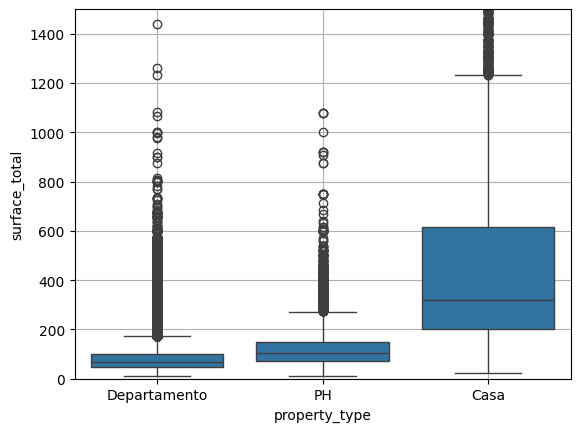

In [ ]:
# sns.boxplot(data = df_util, y = "surface_total")
sns.boxplot(data = df_util, x = 'property_type', y = "surface_total")
plt.ylim(0, 1500)
plt.grid(True)

Conclusión: Luego de graficar las superficies totales por tipos de propiedad, podemos afirmar lo siguiente:

Los departamentos, en su mayoria, tienden a tener superficies mas pequeñas, entre 50 y 100 metros cuadrados, llegando a tener superficies como maximo de hasta 175 metros cuadrados, y como minimo hasta 15 metros cuadrados, aproximadamente. Aunque también tenemos valores outliers o atipicos, que representan superficies superiores a 200 metros cuadrados, hasta mas de 1000 metros cuadrados, pero estos son casos excepcionales

Los PH muestran una tendencia de que las superficies se concentran entre 50 y 155 metros cuadrados, con superficies hasta de 280 metros cuadrados como maximo, y superficies minimas de hasta 15 metros cuadrados
Y también se observan algunos outliers de superficies mucho mayores, superiores a 290 metros cuadrados, pero estos son pocos y representan excepciones

Las casas tienden a tener superficies más variadas que los departamentos y los PH. Pero la mayoría de las casas se concentran en superficies entre 200 y 620 metros cuadrados. Con superficies maximas que llegan hasta 1230 metros cuadrados, y superficies minimas hasta de 30 metros cuadrados
Los outliers para las casas son más comunes y se extienden a superficies muchos mas grandes, llegando hasta más de 1240 metros cuadrados. Indicando asi que las casas pueden tener una variabilidad de superficie

Para finalizar, podemos afirmar que los outliers en todas las categorías tienden a que hay algunas propiedades con superficies excepcionalmente grandes, pero la mayoría de las propiedades están dentro de un rango más típico y normal.

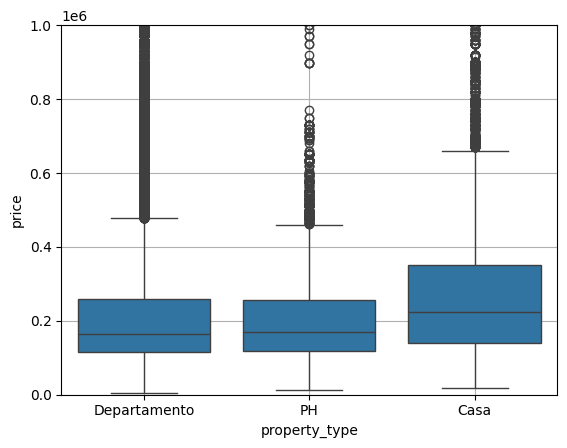

In [ ]:
# sns.boxplot(data = df_nuevo, y = "price")
sns.boxplot(data = df_util, x = 'property_type', y = "price")
plt.ylim(0, 1000000)
plt.grid(True)

Conclusión: Luego de graficar los precios y los departamentos, PH y casas podemos afirmar lo siguiente:

Los departamentos tinen una concentración de precios entre $1.100.000 y $2.600.000, con precios que pueden llegar como maximo hasta $4.900.000, y que llegan como minimo hasta $20.000

Los PH similarmente a los departamentos, tienen la mayoria de sus precios entre $1.200.000 y $2.500.000, con precios que pueden llegar como maximo hasta $4.700.000, y como minimo hasta $50.000

Las casas tienen una mayor variabilidad de precios, que en su mayoria se encuentran entre $1.500.000 y $3.500.000, llegando a tener precios como maximo de $5.100.000, y como minimo de $70.000

Finalmente, podemos asegurar que las casas tienden a tener un precio mayor, y a una mayor variedad de precios, acaparando los precios de los departamos y los PH. Los deparamentos y los PH estan muy similares teniendo asi una mayor concentracion de precios menor a las casas

**Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

df_nuevo.corr()

Las correlaciones suelen graficarse en mapas de calor. Utilizá el siguiente código para generar un mapa de calor y sacar conclusiones sobre que variables tienen mayor correlación (más cercanas a 1)

plt.figure(figsize=(20,10))

sns.heatmap(df_nuevo.corr(),cmap='coolwarm',annot=True)

In [ ]:
columnas = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
df_final = df_util[columnas]

<Axes: >

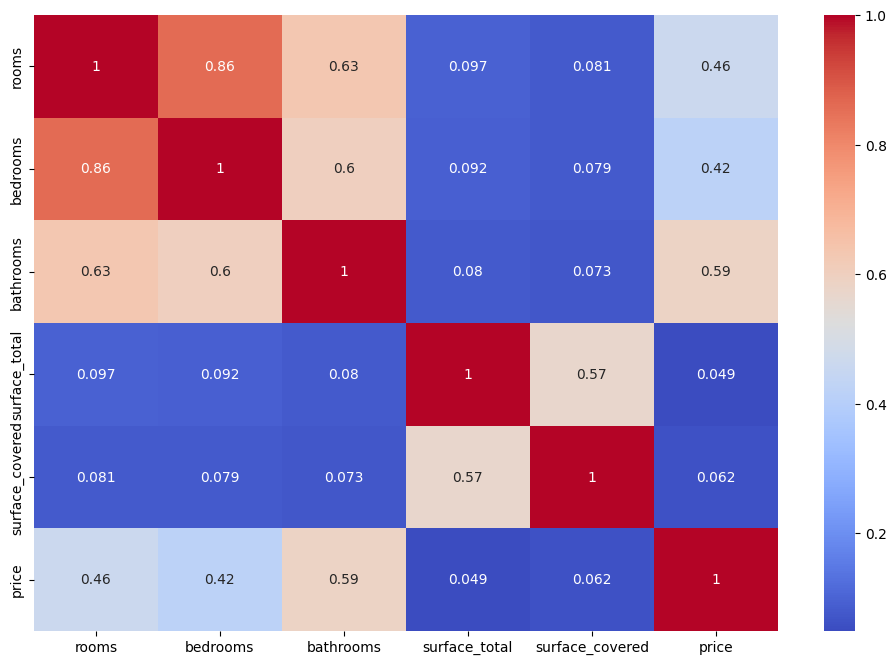

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_final.corr(),cmap='coolwarm',annot=True)

Conclusion: Sobre todas las propiedades

rooms (espacios):

Correlación con el precio: 0.46.

Tiene una correlación moderada, significa que a medida que el número de espacios aumenta, el precio tiende a aumentar también.

bedrooms (habitaciones):

Correlación con el precio: 0.42.

Similar a los espacios, hay una correlación moderada, lo que indica que el número de habitaciones puede ser un buen indicador del precio, aunque ligeramente menos fuerte que los espacios.

bathrooms (baños):

Correlación con el precio: 0.59.

De todas las variables, el número de baños es la que muestra la correlación más alta con el precio, lo que significa que es una variable clave para predecir el precio de la propiedad.

surface_total (superficie total):

Correlación con el precio: 0.049.

La correlación es bastante baja, lo que indica que la superficie total no es un buen predictor del precio.

surface_covered (superficie cubierta):

Correlación con el precio: 0.062.

Al igual que la superficie total, la superficie cubierta tampoco muestra una correlación significativa con el precio.

Por lo tanto, para finalizar, podemos afirmar que:

Las variables que mejor predicen el precio son bathrooms (0.59), seguido de rooms (0.46) y bedrooms (0.42).

Las variables superficie total y cubierta no parecen tener una fuerte relación con el precio en este caso.



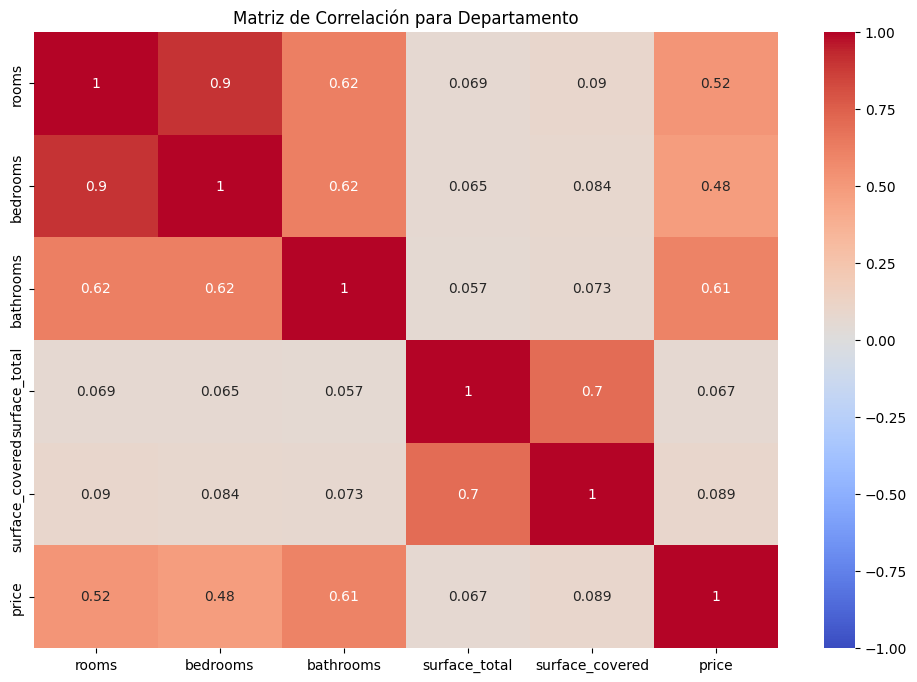

In [ ]:
# Filtrar por el tipo de propiedad, por ejemplo 'departamento'
depto = 'Departamento'  # Cambia esto por el tipo de propiedad que deseas
df_depto = df_util[df_util['property_type'] == depto]

# Seleccionar solo las columnas que vamos a analizar
df_seleccionadoDepto = df_depto[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

# Crear la matriz de correlación
corrDepto = df_seleccionadoDepto.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(corrDepto, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title(f'Matriz de Correlación para {depto.capitalize()}')
plt.show()

Conclusion: Sobre los departamentos

rooms (espacios):

Correlación con el precio: 0.52.

Tiene una correlación moderada, significa que a medida que el número de espacios aumenta, el precio tiende a aumentar también.

bedrooms (habitaciones):

Correlación con el precio: 0.48.

Similar a los espacios, hay una correlación moderada, lo que indica que el número de habitaciones puede ser un buen predictor del precio, aunque ligeramente menos fuerte que los espacios.

bathrooms (baños):

Correlación con el precio: 0.61.

De todas las variables, el número de baños es la que muestra la correlación más alta con el precio, lo que significa que es una variable clave para predecir el precio de la propiedad.

surface_total (superficie total):

Correlación con el precio: 0.067.

La correlación es bastante baja, lo que indica que la superficie total no es un buen predictor del precio.

surface_covered (superficie cubierta):

Correlación con el precio: 0.089.

Al igual que la superficie total, la superficie cubierta tampoco muestra una correlación significativa con el precio.

Por lo tanto, para finalizar, podemos afirmar que:

Las variables que mejor predicen el precio son bathrooms (0.61), seguido de rooms (0.52) y bedrooms (0.48).

Las variables superficie total y cubierta no parecen tener una fuerte relación con el precio en este caso.

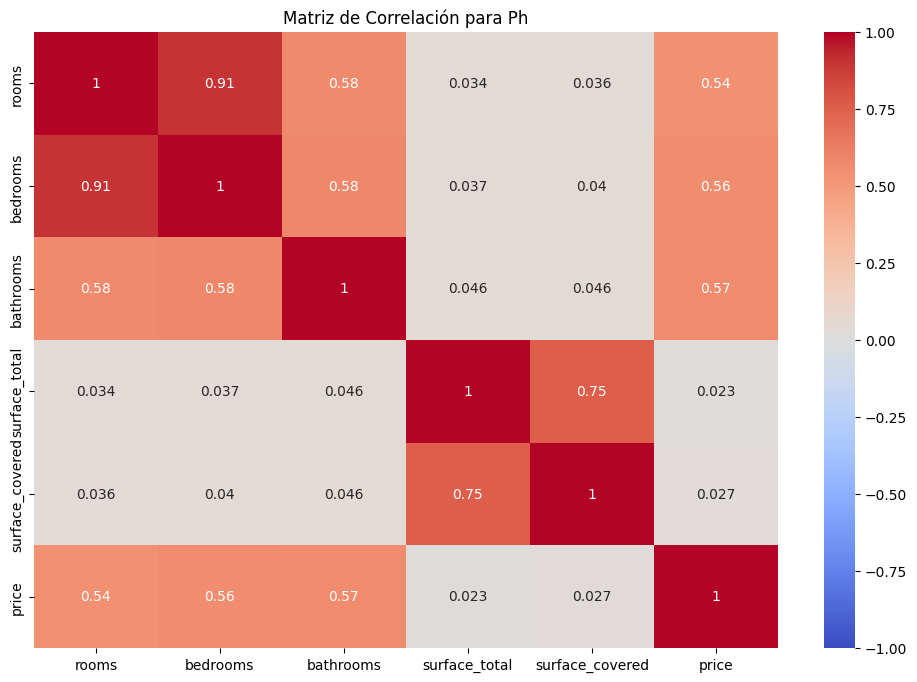

In [ ]:
# Filtrar por el tipo de propiedad, por ejemplo 'departamento'
ph = 'PH'  # Cambia esto por el tipo de propiedad que deseas
df_ph = df_util[df_util['property_type'] == ph]

# Seleccionar solo las columnas que vamos a analizar
df_seleccionadoPH = df_ph[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

# Crear la matriz de correlación
corrPH = df_seleccionadoPH.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(corrPH, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title(f'Matriz de Correlación para {ph.capitalize()}')
plt.show()

Conclusion: Sobre los PH

rooms (espacios):

Correlación con el precio: 0.54.

Tiene una correlación moderada, significa que a medida que el número de espacios aumenta, el precio tiende a aumentar también.

bedrooms (habitaciones):

Correlación con el precio: 0.56.

Similar a los espacios, hay una correlación moderada, lo que indica que el número de habitaciones puede ser un buen predictor del precio, aunque ligeramente mas fuerte que los espacios.

bathrooms (baños):

Correlación con el precio: 0.57.

Similar a rooms y bedrooms, de todas las variables, el número de baños es la que muestra la correlación más alta con el precio, lo que significa que es una variable clave para predecir el precio de la propiedad.

surface_total (superficie total):

Correlación con el precio: 0.023.

La correlación es bastante baja, lo que indica que la superficie total no es un buen predictor del precio.

surface_covered (superficie cubierta):

Correlación con el precio: 0.027.

Al igual que la superficie total, la superficie cubierta tampoco muestra una correlación significativa con el precio.

Por lo tanto, para finalizar, podemos afirmar que:

Las variables que mejor predicen el precio son bathrooms (0.57), seguido de rooms (0.54) y bedrooms (0.56).

Las variables superficie total y cubierta no parecen tener una fuerte relación con el precio en este caso.

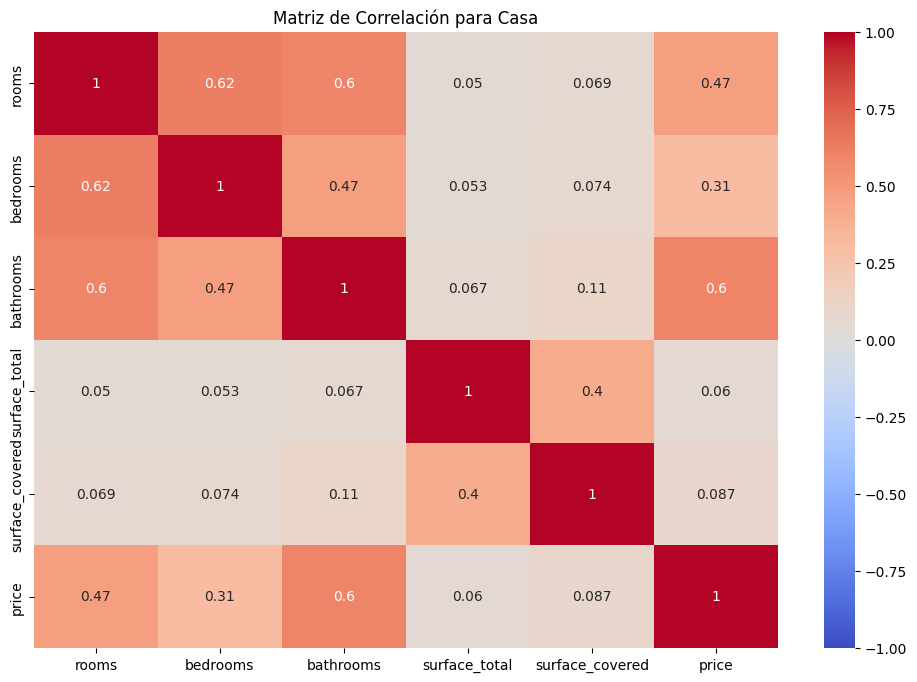

In [ ]:
# Filtrar por el tipo de propiedad, por ejemplo 'departamento'
casa = 'Casa'  # Cambia esto por el tipo de propiedad que deseas
df_casa = df_util[df_util['property_type'] == casa]

# Seleccionar solo las columnas que vamos a analizar
df_seleccionadoCasa = df_casa[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

# Crear la matriz de correlación
corrCasa = df_seleccionadoCasa.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(corrCasa, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title(f'Matriz de Correlación para {casa.capitalize()}')
plt.show()

Conclusion: Sobre las casas

rooms (espacios):

Correlación con el precio: 0.47.

Tiene una correlación moderada, significa que a medida que el número de espacios aumenta, el precio tiende a aumentar también.

bedrooms (habitaciones):

Correlación con el precio: 0.31.

Con una correlacion menor a los espacios, aunque bajamente moderada, lo que indica que el número de habitaciones puede no ser el ideal predictor del precio, aunque no deberia descartarselo.

bathrooms (baños):

Correlación con el precio: 0.6.

Con el doble de los bedrooms. De todas las variables, el número de baños es la que muestra la correlación más alta con el precio, lo que significa que es una variable clave para predecir el precio de la propiedad.

surface_total (superficie total):

Correlación con el precio: 0.06.

La correlación es bastante baja, lo que indica que la superficie total no es un buen predictor del precio.

surface_covered (superficie cubierta):

Correlación con el precio: 0.087.

Al igual que la superficie total, la superficie cubierta tampoco muestra una correlación significativa con el precio.

Por lo tanto, para finalizar, podemos afirmar que:

Las variables que mejor predicen el precio son bathrooms (0.6), seguido de rooms (0.47) y bedrooms (0.31).

Las variables superficie total y cubierta no parecen tener una fuerte relación con el precio en este caso.

# Conclusion Final sobre correlaciones

Después de realizar un análisis detallado de los mapas de calor obtenidos del set de datos que corresponden a las diferentes tipos de propiedades en las que se incluyen los departamentos, PH y casas. Podemos afirmar que el espacio que es mejor predictor de precios son los baños, luego las habitaciones, y por ulitmo los espacios

In [ ]:
# Suponiendo que tienes un DataFrame llamado 'df' con tus datos.

# Filtro para departamentos en Córdoba, Mendoza y Misiones
departamentos_ciudades = df_util[(df_util['property_type'] == 'Departamento') &
                            (df_util['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur']))]

PH_ciudades = df_util[(df_util['property_type'] == 'PH') &
                            (df_util['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur']))]

# Filtro para casas en Entre Rios, Mendoza y Rio Negro
casas_ciudades = df_util[(df_util['property_type'] == 'Casa') &
                          (df_util['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur']))]

# Agrupación y conteo para departamentos
conteo_departamentos = departamentos_ciudades.groupby('l2').size().reset_index(name='cantidad_departamentos')

conteo_PH = PH_ciudades.groupby('l2').size().reset_index(name='cantidad_PH')

# Agrupación y conteo para casas
conteo_casas = casas_ciudades.groupby('l2').size().reset_index(name='cantidad_casas')

# Mostrar los resultados
print("Cantidad de departamentos por ciudad:")
print(conteo_departamentos)

print("\nCantidad de PH por ciudad:")
print(conteo_PH)

print("\nCantidad de casas por ciudad:")
print(conteo_casas)

Cantidad de departamentos por ciudad:
                         l2  cantidad_departamentos
0  Bs.As. G.B.A. Zona Norte                   14942
1    Bs.As. G.B.A. Zona Sur                    6938
2           Capital Federal                   76443

Cantidad de PH por ciudad:
                         l2  cantidad_PH
0  Bs.As. G.B.A. Zona Norte         1566
1    Bs.As. G.B.A. Zona Sur         1369
2           Capital Federal         9506

Cantidad de casas por ciudad:
                         l2  cantidad_casas
0  Bs.As. G.B.A. Zona Norte            6259
1    Bs.As. G.B.A. Zona Sur            7141
2           Capital Federal            2468


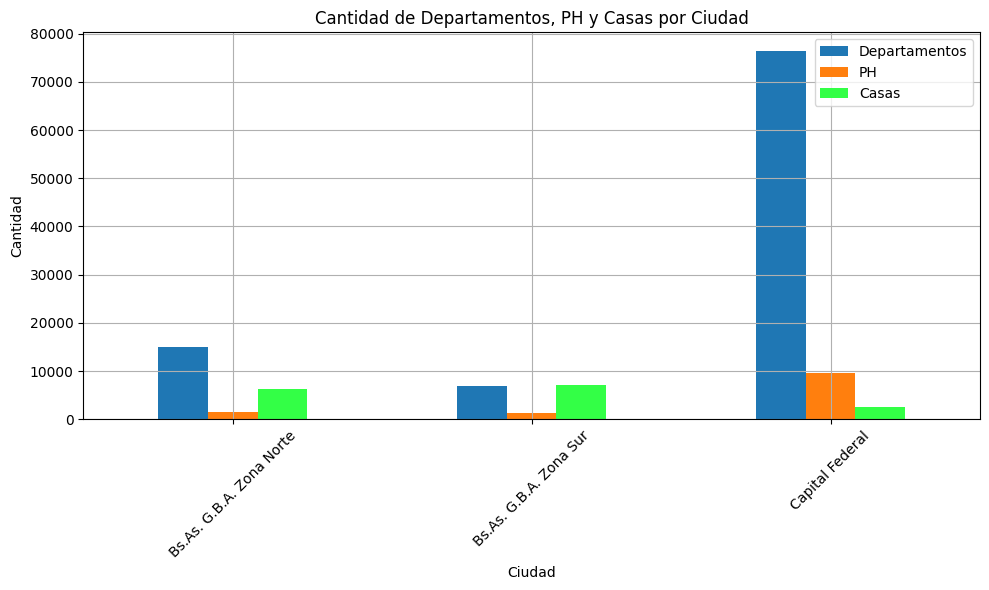

In [ ]:
# Suponiendo que tienes un DataFrame llamado 'df' con tus datos.

# Filtro para departamentos en Córdoba, Mendoza y Misiones
departamentos_ciudades = df_util[(df_util['property_type'] == 'Departamento') &
                            (df_util['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste']))]

PH_ciudades = df_util[(df_util['property_type'] == 'PH') &
                            (df_util['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste']))]

# Filtro para casas en Entre Rios, Mendoza y Rio Negro
casas_ciudades = df_util[(df_util['property_type'] == 'Casa') &
                          (df_util['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste']))]

# Agrupación y conteo para departamentos
conteo_departamentos = departamentos_ciudades.groupby('l2').size().reset_index(name='cantidad_departamentos')

conteo_PH = PH_ciudades.groupby('l2').size().reset_index(name='cantidad_PH')

# Agrupación y conteo para casas
conteo_casas = casas_ciudades.groupby('l2').size().reset_index(name='cantidad_casas')

# Merge para unir ambos DataFrames en uno solo
conteo_total = pd.merge(conteo_departamentos, conteo_PH, on='l2', how='outer').fillna(0)
conteo_total = pd.merge(conteo_total, conteo_casas, on='l2', how='outer').fillna(0)

# Gráfico de barras
conteo_total.set_index('l2').plot(kind='bar', figsize=(10,6), color=['#1f77b4', '#ff7f0e', '#33ff46'])

# Personalización del gráfico
plt.title('Cantidad de Departamentos, PH y Casas por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(['Departamentos', 'PH', 'Casas'])
plt.tight_layout()
plt.grid(True)
# Mostrar el gráfico
plt.show()

# INFORME FINAL

Estimados Gerentes,
Después de realizar un análisis detallado de los datos obtenidos que corresponden a los tipos de propiedad que mas se venden en diferentes ciudades de la provincia de Buenos Aires.

Estos datos incluyen los tipos de propiedad: Departamentos, PH y Casas

Incluyen las regiones: Capital Federal, GBA Zona Norte y GBA Zona Sur

Puedo informar que el dato mas importante a saber es que la mayor concentración de ventas son los departamentos en la Capital Federal, con una diferencia gigantezca, habiendo 76443 ventas en total

Luego en una medida bastante menor tambien tenemos departamentos pero en GBA Zona Norte, teniendo asi 14942 ventas

Similarmente, aunque en menor medida tenemos a los PH en Capital Federal, con 9506 ventas

En casi la misma medida, pero menor, tenemos a los departamentos y las casas en GBA Zona Sur, con 6938 ventas de Departamentos en Zona Sur, y 7141 ventas de casas en Zona Sur

Similarmente las casas en Zona Norte con 6259 ventas

Luego los PH en zona Sur y Zona Norte, las ventas demasiado bajas, teniendo asi 1566 en Zona Norte, y 1369 en Zona Sur

Y por ultimo las casas en Capital federal representan 2468 ventas

Por lo tanto, podemos afirmar que hay una clara tendencia de departamentos en la Capital Federal, con una muy marcada diferencia, lo que es logico debido a que es una zona céntrica con alta densidad de población

Zona Norte muestra un mercado más mixto, con una oferta significativa tanto de departamentos como en casas, lo que puede atraer a diferentes tipos de compradores (familias que buscan casas y personas solteras o parejas que prefieren departamentos).

Zona Sur tiene una distribución menos densa de propiedades, pero también ofrece casas en cantidades considerables.

Los PH tienen una menor presencia en todas las regiones, lo que puede ser un segmento del mercado menos explotado o con menor demanda.